In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving survey.csv to survey.csv


In [ ]:
import pandas as pd
import io
  
survey = pd.read_csv(io.BytesIO(uploaded['survey.csv']))

In [ ]:
survey

,ResponseId,YearsCode,Age,LanguageHaveWorkedWith,Gender
0,1,NaN,25-34 years old,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Man
1,2,7,18-24 years old,JavaScript;Python,Man
2,3,NaN,18-24 years old,Assembly;C;Python;R;Rust,Man
3,4,NaN,35-44 years old,JavaScript;TypeScript,Man
4,5,17,25-34 years old,Bash/Shell;HTML/CSS;Python;SQL,Man
...,...,...,...,...,...
83434,83435,6,25-34 years old,Clojure;Kotlin;SQL,Man
83435,83436,4,18-24 years old,NaN,Man
83436,83437,10,25-34 years old,Groovy;Java;Python,Man
83437,83438,5,25-34 years old,Bash/Shell;JavaScript;Node.js;Python,Man


The dataset contains over 83,000 entries along with 5 columns.

In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ResponseId              83439 non-null  int64 
 1   YearsCode               81641 non-null  object
 2   Age                     82407 non-null  object
 3   LanguageHaveWorkedWith  82357 non-null  object
 4   Gender                  82286 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


As seen there are some null values in every column except Response ID.  It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (83439)

# Gender

In [ ]:
import matplotlib.pyplot as plt
survey_gender = survey[['Gender']]

survey_gender.groupby('Gender').size().reset_index(name='counts').sort_values(by="counts")


,Gender,counts
7,"Man;Woman;Or, in your own words:",1
14,"Woman;Non-binary, genderqueer, or gender non-c...",9
2,"Man;Non-binary, genderqueer, or gender non-con...",11
15,"Woman;Or, in your own words:",16
6,"Man;Woman;Non-binary, genderqueer, or gender n...",17
5,"Man;Woman;Non-binary, genderqueer, or gender n...",21
9,"Non-binary, genderqueer, or gender non-conform...",21
4,Man;Woman,41
13,"Woman;Non-binary, genderqueer, or gender non-c...",147
1,"Man;Non-binary, genderqueer, or gender non-con...",252


As shown above, the gender column contains multiple picks. So we can omit it for simplicity. 

In [ ]:
survey.where(~(survey.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [ ]:
survey_gender = survey[['Gender']]

survey_gender.groupby('Gender').size().reset_index(name='counts').sort_values(by="counts")

,Gender,counts
2,"Or, in your own words:",413
1,"Non-binary, genderqueer, or gender non-conforming",690
3,Prefer not to say,1442
4,Woman,4120
0,Man,74817


Question 1 :- Show the Graphical Representation of Gender Division

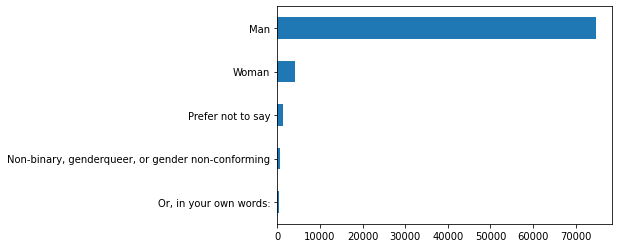

In [ ]:
survey_gender['Gender'].value_counts().sort_values().plot(kind='barh')

Answer:- It is clearly visible that men dominate this survey and women and other genders are underrepresented in the programming community.

# Age

Question 2 :- Which age group are more involve in the programming community?

In [ ]:
survey_age = survey[['Age']]

survey_age.groupby('Age').size().reset_index(name='counts').sort_values(by="counts")

,Age,counts
5,65 years or older,414
6,Prefer not to say,564
4,55-64 years old,1800
7,Under 18 years old,5283
3,45-54 years old,5433
2,35-44 years old,15081
0,18-24 years old,20761
1,25-34 years old,32269


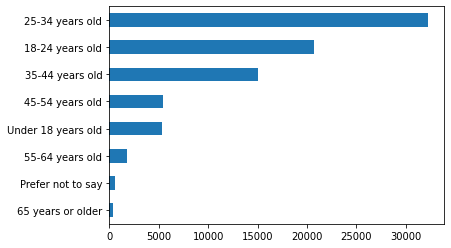

In [ ]:
survey_age['Age'].value_counts().sort_values().plot(kind='barh')

Answer 2:- As seen from the bar graph, age group 25-34 and group 18-24 contribute the most in the programming community. The reason is many young people have taken up computer science as their field of study in last 2 decades.

# LanguageHaveWorkedWith

Question 3: - Which programming languages were in demand in 2021?

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
languages_worked_df = split_multicolumn(survey.LanguageHaveWorkedWith)

In [ ]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript     63.603351
HTML/CSS       54.864032
Python         47.172186
SQL            46.100744
Java           34.618104
Node.js        33.183523
TypeScript     29.554525
C#             27.251046
Bash/Shell     26.438476
C++            23.738300
PHP            21.518714
C              20.508395
PowerShell     10.473520
Go              9.339757
Kotlin          8.143674
Rust            6.813361
Ruby            6.586848
Dart            5.908508
Assembly        5.430314
Swift           4.982083
R               4.954518
Matlab          4.559019
VBA             4.559019
Groovy          2.937475
Objective-C     2.731337
Scala           2.543175
Perl            2.387373
Haskell         2.050600
Delphi          2.049401
Clojure         1.836072
Elixir          1.694651
LISP            1.276382
Julia           1.256007
F#              0.937212
Erlang          0.761035
APL             0.617217
Crystal         0.550102
COBOL           0.512950
dtype: float64

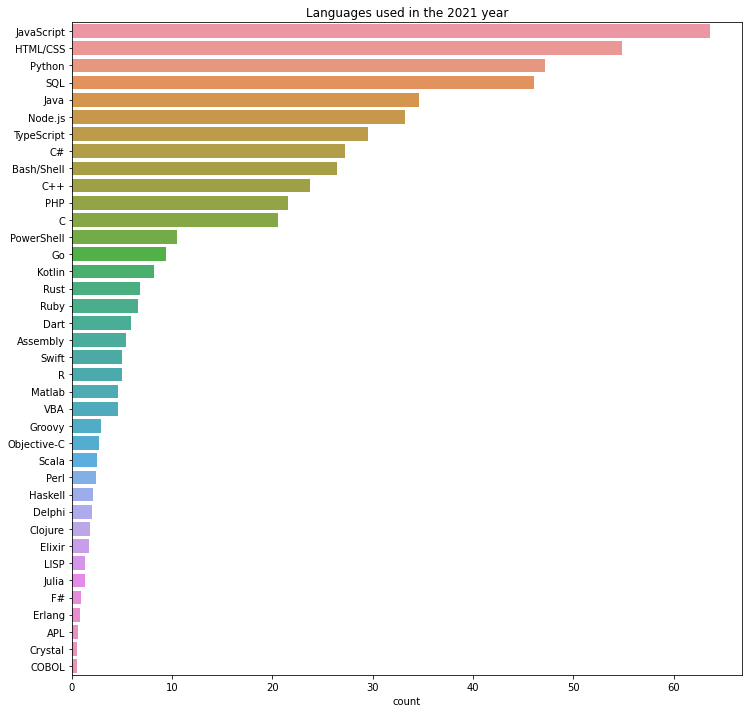

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the 2021 year");
plt.xlabel('count');

Answer 3:- JavaScript and HTML/CSS were in most demand in 2021. As both are 



frontend languages and easy to learn and apply it is natural to see such trend. Pytrhon and SQL were also in demand in the year 2021.

# Years in Coding

As the yearscode is in object I have converted it into numeric for better analysis.

In [ ]:
survey['YearsCode'] = pd.to_numeric(survey.YearsCode, errors='coerce')

In [ ]:
survey.describe()

,ResponseId,YearsCode
count,82635.00000,79224.000000
mean,41729.18825,12.489296
std,24079.61954,9.625972
min,1.00000,1.000000
25%,20893.50000,5.000000
50%,41728.00000,10.000000
75%,62573.50000,17.000000
max,83439.00000,50.000000


Question4:- Which programming language do people with different years of coding use?

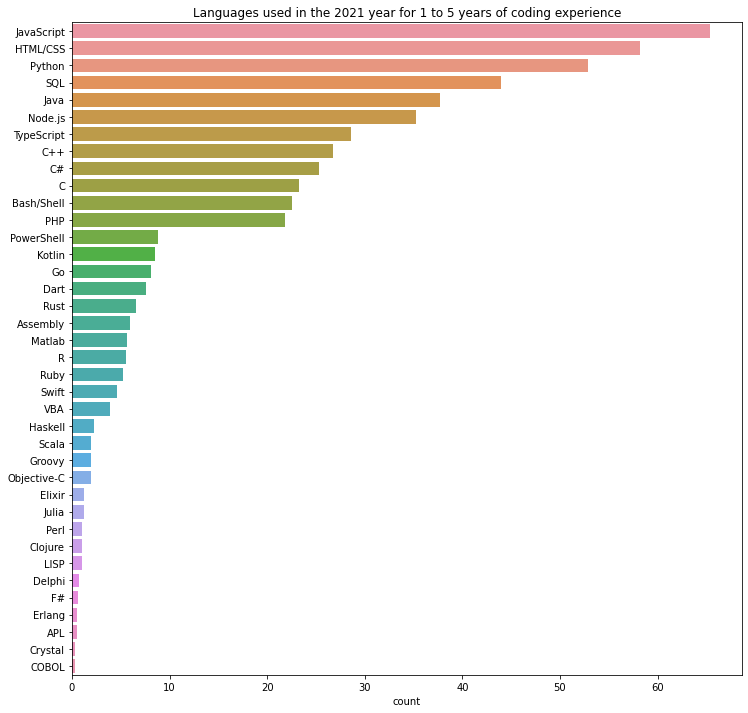

In [ ]:
data_1 = survey.loc[(survey['YearsCode'] >= 1) & (survey['YearsCode'] <= 10)]
languages_worked_df = split_multicolumn(data_1.LanguageHaveWorkedWith)
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the 2021 year for 1 to 10 years of coding experience");
plt.xlabel('count');

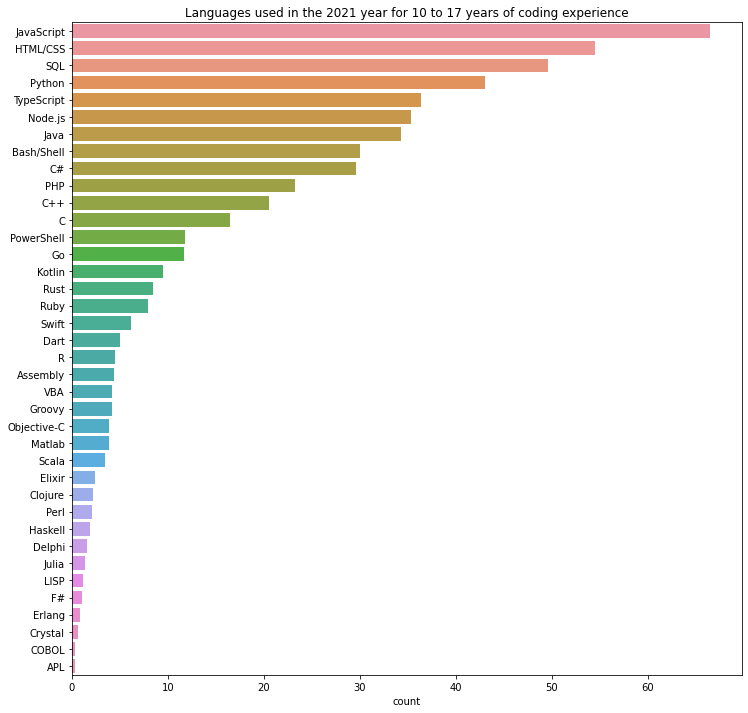

In [ ]:
data_2 = survey.loc[(survey['YearsCode'] >10) & (survey['YearsCode'] <= 17)]
languages_worked_df = split_multicolumn(data_2.LanguageHaveWorkedWith)
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the 2021 year for 10 to 17 years of coding experience");
plt.xlabel('count');

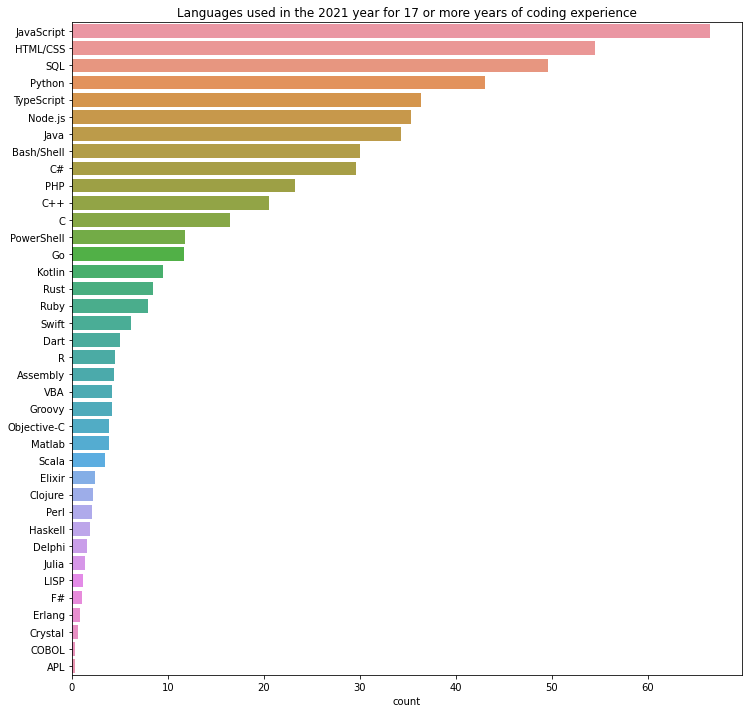

In [ ]:
data_3 = survey.loc[(survey['YearsCode'] >17) & (survey['YearsCode'] <= 50)]
languages_worked_df = split_multicolumn(data_2.LanguageHaveWorkedWith)
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the 2021 year for 17 or more years of coding experience");
plt.xlabel('count');

Answer 4: It is clearly visible that frontend languages are more in demand for all groups. But the noticable change is TypeScript's demand increases as the experience in coding increases. 

Question 5: Which languages are more popular among different age groups

In [ ]:
survey['Age'].astype(str)

0        25-34 years old
1        18-24 years old
2        18-24 years old
3        35-44 years old
4        25-34 years old
              ...       
83434    25-34 years old
83435    18-24 years old
83436    25-34 years old
83437    25-34 years old
83438    18-24 years old
Name: Age, Length: 83439, dtype: object

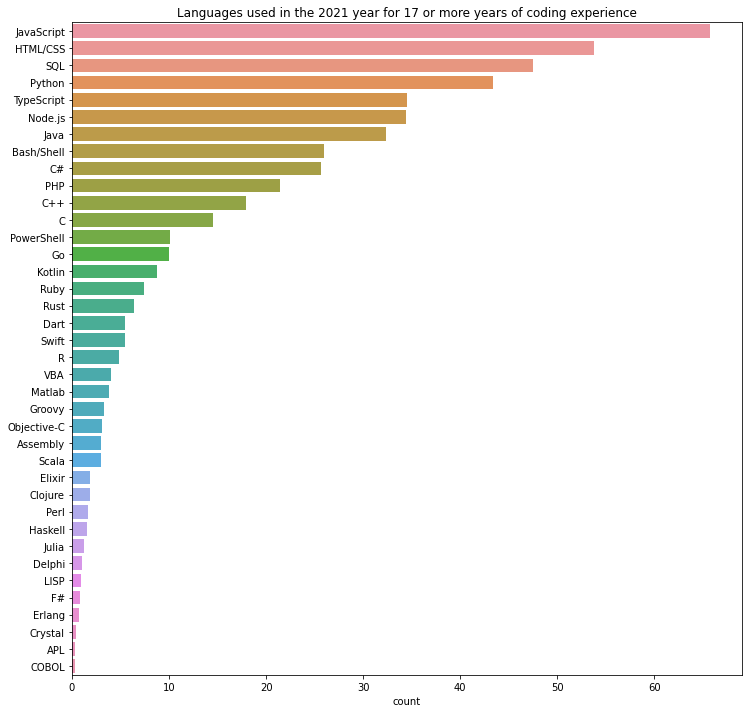

In [ ]:

data_4 = survey[survey['Age']=='25-34 years old']
languages_worked_df = split_multicolumn(data_4.LanguageHaveWorkedWith)
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the 2021 year for 25-34 years age group");
plt.xlabel('count');

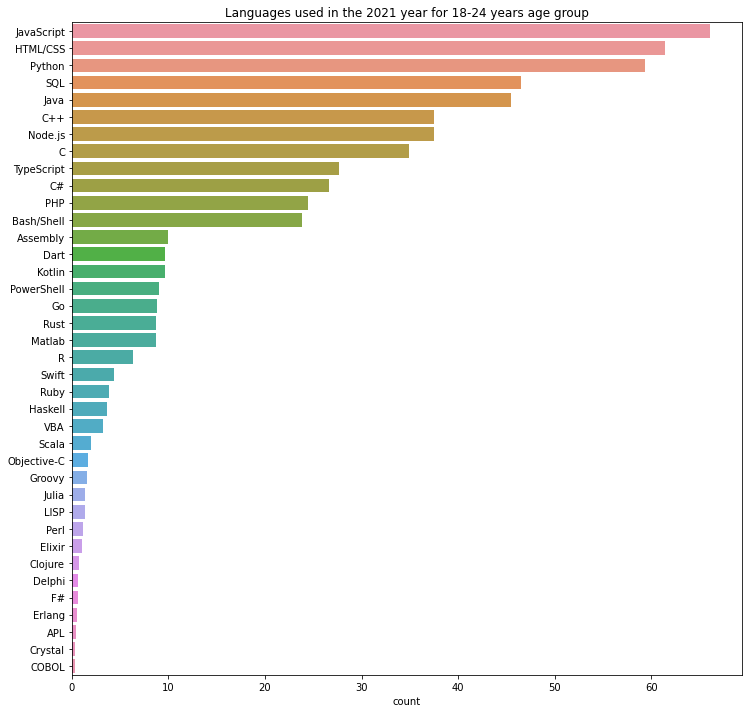

In [ ]:
data_5 = survey[survey['Age']=='18-24 years old']
languages_worked_df = split_multicolumn(data_5.LanguageHaveWorkedWith)
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the 2021 year for 18-24 years age group");
plt.xlabel('count');


Answer 5:- It is clearly visible that frontend languages are more in demand for all groups. But the noticable change is TypeScript is used more by the older groups as compare to Java whereas youngsters use more Java as they are taught Java in their universities.

# SUMMARY

Question 1 :- Show the Graphical Representation of Gender Division

Conclusion :- It is clearly visible that men dominate this survey and women and other genders are underrepresented in the programming community.

Question 2 :- Which age group are more involve in the programming community?

Conclusion :- As seen from the bar graph, age group 25-34 and group 18-24 contribute the most in the programming community. The reason is many young people have taken up computer science as their field of study in last 2 decades.

Question 3: - Which programming languages were in demand in 2021?

Conclusion :- Answer 3:- JavaScript and HTML/CSS were in most demand in 2021. As both are

frontend languages and easy to learn and apply it is natural to see such trend. Pytrhon and SQL were also in demand in the year 2021.

Question4:- Which programming language do people with different years of coding use?

Conclusion:- It is clearly visible that frontend languages are more in demand for all groups. But the noticable change is TypeScript's demand increases as the experience in coding increases.

Question 5: Which languages are more popular among different age groups

Conclusion :- It is clearly visible that frontend languages are more in demand for all groups. But the noticable change is TypeScript is used more by the older groups as compare to Java whereas youngsters use more Java as they are taught Java in their universities.